In [1]:
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
onehotencoder = OneHotEncoder()
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train = train.drop(['Surname','CustomerId','HasCrCard'],axis = 1)
test = test.drop(['Surname','CustomerId','HasCrCard'],axis = 1)
train

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,551,720,Spain,Male,38,5,114051.97,2,1,107577.29,0
1,6897,682,France,Female,54,4,62397.41,1,0,113088.60,1
2,4588,672,France,Female,31,5,119903.67,1,1,132925.17,0
3,291,592,Spain,Female,40,4,104257.86,1,0,110857.33,0
4,1673,753,Spain,Male,42,5,120387.73,1,1,126378.57,0
...,...,...,...,...,...,...,...,...,...,...,...
7995,5345,568,France,Female,35,6,121079.60,2,1,124890.50,1
7996,5837,602,Germany,Female,45,7,145846.07,1,0,99276.02,0
7997,7335,679,Spain,Female,43,5,132810.01,1,0,130780.85,1
7998,9552,715,France,Male,38,4,118729.45,1,0,95484.52,0


In [2]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)
train
train_column = []
train

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,551,720,38,5,114051.97,2,1,107577.29,0,0,0,1,0,1
1,6897,682,54,4,62397.41,1,0,113088.60,1,1,0,0,1,0
2,4588,672,31,5,119903.67,1,1,132925.17,0,1,0,0,1,0
3,291,592,40,4,104257.86,1,0,110857.33,0,0,0,1,1,0
4,1673,753,42,5,120387.73,1,1,126378.57,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5345,568,35,6,121079.60,2,1,124890.50,1,1,0,0,1,0
7996,5837,602,45,7,145846.07,1,0,99276.02,0,0,1,0,1,0
7997,7335,679,43,5,132810.01,1,0,130780.85,1,0,0,1,1,0
7998,9552,715,38,4,118729.45,1,0,95484.52,0,1,0,0,0,1


In [3]:
test

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,2209,726,39,3,62397.41,1,0,106139.31,1,0,0,1,0
1,9924,661,42,3,130339.64,1,0,125776.38,1,0,0,0,1
2,4617,545,34,6,62397.41,2,1,78372.28,1,0,0,0,1
3,6077,731,42,3,86717.08,1,0,136026.27,0,0,1,1,0
4,9240,533,50,6,62397.41,1,1,135205.58,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7872,628,35,6,62397.41,2,1,96201.09,1,0,0,0,1
1996,4257,639,41,5,98154.30,2,0,109531.64,0,1,0,0,1
1997,2273,548,46,3,119078.34,2,1,116725.67,1,0,0,1,0
1998,315,602,44,7,62397.41,2,1,128135.95,0,0,1,1,0


In [4]:
for i in train.columns:
    train_column.append(i)
test_column = []
for i in test.columns:
    test_column.append(i)
train_RowNumber = train['RowNumber']
test_RowNumber = test['RowNumber']

In [5]:
train['Exited'][1]

1

In [6]:
train

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,551,720,38,5,114051.97,2,1,107577.29,0,0,0,1,0,1
1,6897,682,54,4,62397.41,1,0,113088.60,1,1,0,0,1,0
2,4588,672,31,5,119903.67,1,1,132925.17,0,1,0,0,1,0
3,291,592,40,4,104257.86,1,0,110857.33,0,0,0,1,1,0
4,1673,753,42,5,120387.73,1,1,126378.57,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5345,568,35,6,121079.60,2,1,124890.50,1,1,0,0,1,0
7996,5837,602,45,7,145846.07,1,0,99276.02,0,0,1,0,1,0
7997,7335,679,43,5,132810.01,1,0,130780.85,1,0,0,1,1,0
7998,9552,715,38,4,118729.45,1,0,95484.52,0,1,0,0,0,1


In [7]:
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)
train

array([[0.055011  , 0.89250814, 0.18867925, ..., 1.        , 0.        ,
        1.        ],
       [0.68973795, 0.76872964, 0.49056604, ..., 0.        , 1.        ,
        0.        ],
       [0.45879176, 0.73615635, 0.05660377, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.73354671, 0.75895765, 0.28301887, ..., 1.        , 1.        ,
        0.        ],
       [0.95529106, 0.8762215 , 0.18867925, ..., 0.        , 0.        ,
        1.        ],
       [0.01770354, 0.50162866, 0.26415094, ..., 0.        , 1.        ,
        0.        ]])

In [8]:
train = pd.DataFrame(train,columns = train_column)
train['RowNumber'] = train_RowNumber
train = train.drop(['Gender_Female','Geography_Spain','Geography_France'],axis = 1)
train

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Gender_Male
0,551,0.892508,0.188679,0.6,0.409621,0.333333,1.0,0.589163,0.0,0.0,1.0
1,6897,0.768730,0.490566,0.4,0.000000,0.000000,0.0,0.654032,1.0,0.0,0.0
2,4588,0.736156,0.056604,0.6,0.456025,0.000000,1.0,0.887514,0.0,0.0,0.0
3,291,0.475570,0.226415,0.4,0.331954,0.000000,0.0,0.627770,0.0,0.0,0.0
4,1673,1.000000,0.264151,0.6,0.459864,0.000000,1.0,0.810459,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7995,5345,0.397394,0.132075,0.8,0.465350,0.333333,1.0,0.792944,1.0,0.0,0.0
7996,5837,0.508143,0.320755,1.0,0.661749,0.000000,0.0,0.491455,0.0,1.0,0.0
7997,7335,0.758958,0.283019,0.6,0.558373,0.000000,0.0,0.862275,1.0,0.0,0.0
7998,9552,0.876221,0.188679,0.4,0.446714,0.000000,0.0,0.446828,0.0,0.0,1.0


In [9]:
test = pd.DataFrame(test,columns = test_column)
test['RowNumber'] = test_RowNumber
test = test.drop(['Gender_Female','Geography_Spain','Geography_France'],axis = 1)
test

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Geography_Germany,Gender_Male
0,2209,0.912052,0.22,0.2,0.000000,0.000000,0.0,0.572521,0.0,0.0
1,9924,0.700326,0.28,0.2,0.608183,0.000000,0.0,0.804225,0.0,1.0
2,4617,0.322476,0.12,0.8,0.000000,0.333333,1.0,0.244890,0.0,1.0
3,6077,0.928339,0.28,0.2,0.217697,0.000000,0.0,0.925166,0.0,0.0
4,9240,0.283388,0.44,0.8,0.000000,0.000000,1.0,0.915482,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1995,7872,0.592834,0.14,0.8,0.000000,0.333333,1.0,0.455257,0.0,1.0
1996,4257,0.628664,0.26,0.6,0.320077,0.333333,0.0,0.612548,1.0,1.0
1997,2273,0.332248,0.36,0.2,0.507378,0.333333,1.0,0.697433,0.0,0.0
1998,315,0.508143,0.32,1.0,0.000000,0.333333,1.0,0.832066,0.0,0.0


In [10]:
xg = XGBClassifier(n_estimator = 450,eval_metric='mlogloss',
                   learning_rate = 0.05,max_depth = 3,
                   subsample=0.7,colsample_bytree=1,gamma=1)

In [11]:
X = train.drop(['RowNumber','Exited'],axis = 1)
y = train['Exited']
test_X = test.drop(['RowNumber'],axis = 1)

In [12]:
train_X, validation_X, train_y, validation_y = train_test_split(X, y,                                                     
                                                    train_size=0.9, 
                                                    random_state=162,
                                                    stratify=y)
train_X

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Geography_Germany,Gender_Male
320,0.654723,0.509434,0.0,0.478136,0.000000,0.0,0.791647,0.0,0.0
3855,1.000000,0.188679,0.6,0.423641,0.000000,0.0,0.609914,0.0,0.0
2120,0.530945,0.188679,0.6,0.000000,0.333333,1.0,0.214970,0.0,0.0
1826,0.537459,0.094340,0.4,0.000000,0.000000,0.0,0.727633,0.0,1.0
5680,0.511401,0.603774,0.4,0.442673,0.333333,1.0,0.628307,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2139,0.517915,0.301887,0.6,0.000000,0.333333,1.0,0.487070,0.0,1.0
2795,0.517915,0.188679,0.6,0.472385,0.000000,0.0,0.019021,0.0,1.0
1119,0.452769,0.603774,0.4,0.593243,0.000000,0.0,0.347046,1.0,1.0
375,0.866450,0.547170,0.8,0.503092,0.000000,1.0,0.022062,0.0,0.0


In [13]:
xg.fit(train_X,train_y)

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimator=450, n_estimators=100,
              n_jobs=12, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
xg.score(train_X, train_y, sample_weight=None)

0.9397222222222222

In [15]:
xg.fit(X,y)

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimator=450, n_estimators=100,
              n_jobs=12, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
validation_y = pd.DataFrame(validation_y)

In [17]:
pred = xg.predict(validation_X)
new_pred = validation_y
new_pred['Exited'] = pred
new_pred

,Exited
439,0.0
7125,0.0
7000,0.0
2504,0.0
2954,0.0
...,...
6454,1.0
3942,0.0
7549,0.0
6437,0.0


In [18]:
train_X, validation_X, train_y, validation_y = train_test_split(X, y, 
                                                    train_size=0.9, 
                                                    random_state=162,
                                                    stratify=y)
validation_y = pd.DataFrame(validation_y)
validation_y

,Exited
439,0.0
7125,0.0
7000,0.0
2504,0.0
2954,0.0
...,...
6454,1.0
3942,0.0
7549,0.0
6437,0.0


In [19]:
validation_y[validation_y['Exited'] == 1]

,Exited
2171,1.0
4985,1.0
2619,1.0
6787,1.0
3367,1.0
...,...
5752,1.0
5950,1.0
2824,1.0
337,1.0


In [20]:
new_pred[new_pred['Exited'] == 1]

,Exited
2171,1.0
2619,1.0
6787,1.0
3367,1.0
5358,1.0
...,...
3610,1.0
5950,1.0
2824,1.0
337,1.0


In [21]:
print(np.sum(new_pred['Exited']==validation_y['Exited'])/float(len(validation_y)))

0.94


In [22]:
preds = xg.predict(test_X)
pred = pd.DataFrame(preds,columns = ['Exited'])

In [23]:
result = test['RowNumber']
result = pd.DataFrame(result)
result['Exited'] = pred['Exited']
result[result['Exited']==1]

,RowNumber,Exited
4,9240,1.0
15,6613,1.0
21,5196,1.0
29,4608,1.0
31,666,1.0
...,...,...
1971,4641,1.0
1973,6951,1.0
1979,7556,1.0
1982,7875,1.0


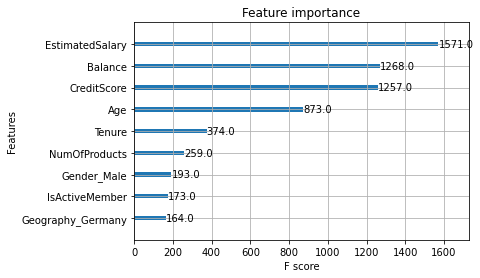

In [24]:
plot_importance(xg)
pyplot.show()

In [25]:
result.to_csv("XGB.csv", index=False)